# Laboratorio 1: Conceptos básicos de aprendizaje automático

## Breast Cancer Set

In [1]:
# Requiere la carpeta de scripts ml
%matplotlib inline
# Auxiliary
from aux_func import *

## Clasificación binaria

La clasificación binaria tiene dos posibles etiquetas para su clasificación: SI y NO (o 0 y 1, o -1 y 1). Nuevamente, se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Similar al caso anterior, para poder visualizar los distintos atributos y como estos afectan el modelo, debemos hacer uso de una selección de atributos a mano. En este caso todos los atributos son válidos, puesto que todos son numéricos. Como en este caso tenemos una clasificación, lo que buscamos ver es la frontera de decisión eligiendo distintos atributos y parámetros para distintos clasificadores. En este caso elegimos 2 atributos ya que la clase se representará por color dentro del gráfico.

### Carga de datos

In [2]:
breast_cancer_data = load_breast_cancer()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(569)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = breast_cancer_data['data'][shuff_train]
X_val = breast_cancer_data['data'][shuff_val]

y_train = breast_cancer_data['target'][shuff_train]
y_val = breast_cancer_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(breast_cancer_data['feature_names'])}

print(breast_cancer_data['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
print("Listado de atributos\n====================")
for feature in breast_cancer_data['feature_names']:
    print("- %s" % feature)

Listado de atributos
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry
- worst fractal dimension


In [4]:
# Seleccionamos dos atributo de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: cambiar con estos features
#x_feature = 'mean radius'
#y_feature = 'mean texture'

# Elegimos los atributos
x_feature = 'mean smoothness'
y_feature = 'mean concavity'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Perceptrón

#### L1 / L2 / elasticnet

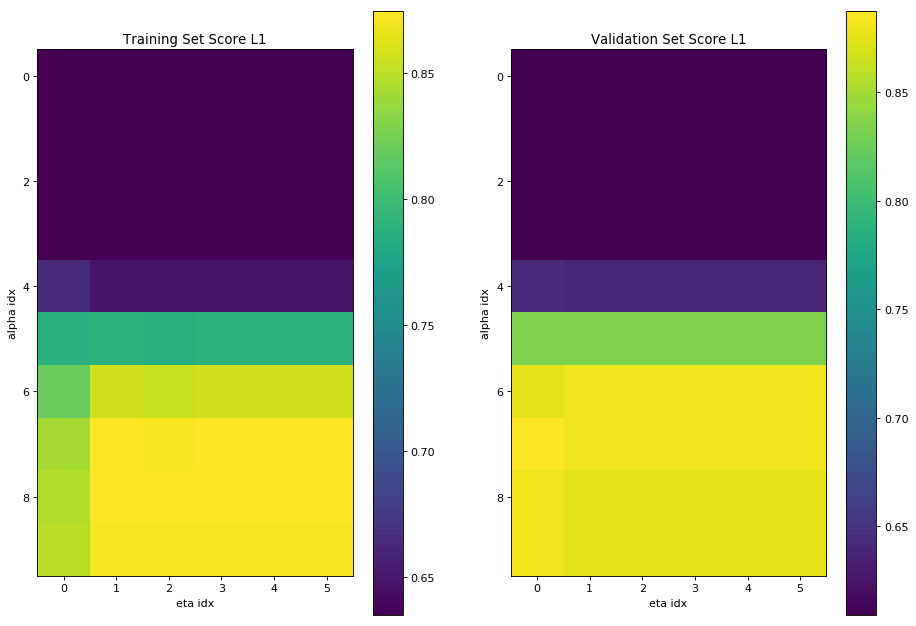

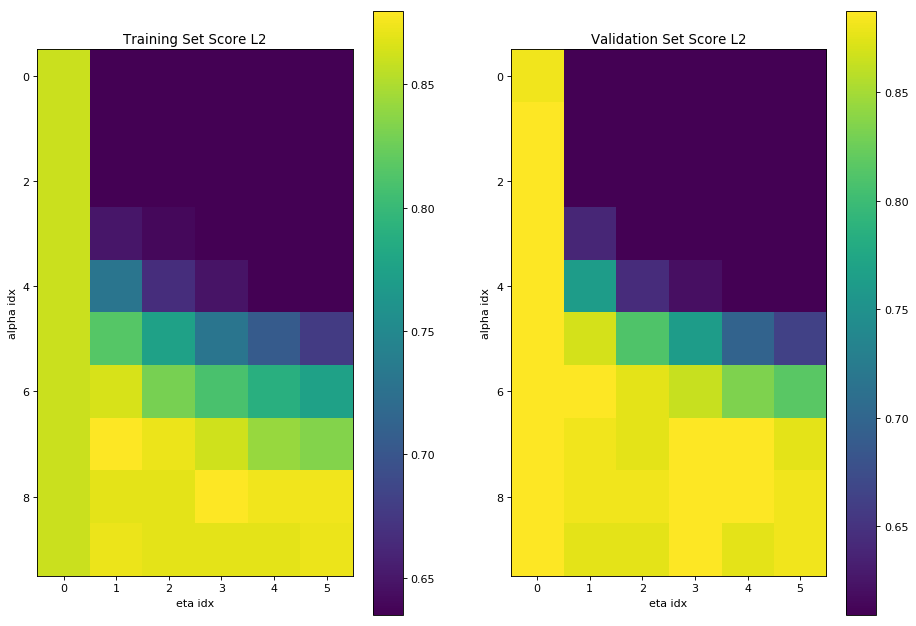

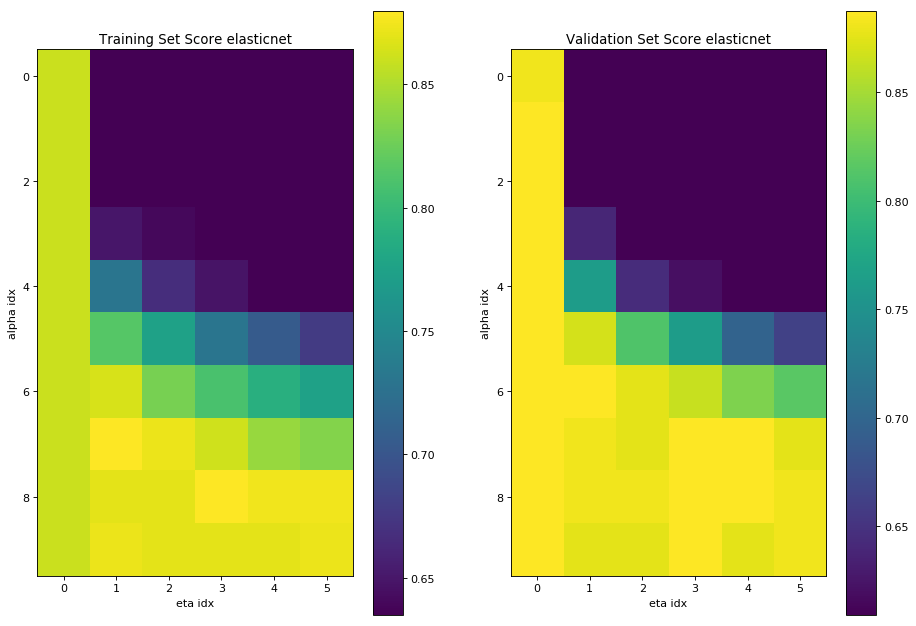

In [5]:
# Fijamos inicialmente el tipo de regularizacion/max_iter/tol
penalty = 'l1' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
max_iter = 200000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol = 0.000001 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)

# Estudiamos el efecto de diferentes ordenes
alpha_vec=list(np.exp((-np.arange(0,10,1))))
eta_vec=list(np.linspace(10**-6,0.5,6))


var_target_name='alpha'; var_target_vec=alpha_vec;
var_target_name_aux='eta0'; var_target_vec_aux=eta_vec;
model_spec = Perceptron(penalty=penalty, alpha=0.5, max_iter=max_iter, tol=tol, eta0=0.5)

l1_perceptron_dict,l1_list_train,l1_list_val=acc_model_two_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)
 
#Graficamos    
matrix_train=np.array(l1_list_train);matrix_val=np.array(l1_list_val)
two_par_heatmap(matrix_train,matrix_val,'eta idx','alpha idx',['Training Set Score L1','Validation Set Score L1'])


######
penalty = 'l2' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
model_spec = Perceptron(penalty=penalty, alpha=0.5, max_iter=max_iter, tol=tol, eta0=0.5)
l2_perceptron_dict,l2_list_train,l2_list_val=acc_model_two_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)
 
#Graficamos    
matrix_train=np.array(l2_list_train);matrix_val=np.array(l2_list_val)
two_par_heatmap(matrix_train,matrix_val,'eta idx','alpha idx',['Training Set Score L2','Validation Set Score L2'])



######
penalty = 'elasticnet' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
model_spec = Perceptron(penalty=penalty, alpha=0.5, max_iter=max_iter, tol=tol, eta0=0.5)
elasticnet_perceptron_dict,elasticnet_list_train,elasticnet_list_val=acc_model_two_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)
 
#Graficamos    
matrix_train=np.array(elasticnet_list_train);matrix_val=np.array(elasticnet_list_val)
two_par_heatmap(matrix_train,matrix_val,'eta idx','alpha idx',['Training Set Score elasticnet','Validation Set Score elasticnet'])


Entonces utilizando los graficos anteriores podemos observar los scores alcanzados tanto en el set de entrenamiento como en el set de validación. Los ejes se correpsonden con los indices de las variables mencionadas (eta-parametro de actualizacion de los pesos y alpha-parametro de regularizacion).

#### Matriz de confusión

La matriz de confusión sirve en clasificación para ver que tanto se desviaron las instancias (de entrenamiento o de validación) de su valor real.

#### L1 / L2 / elasticnet

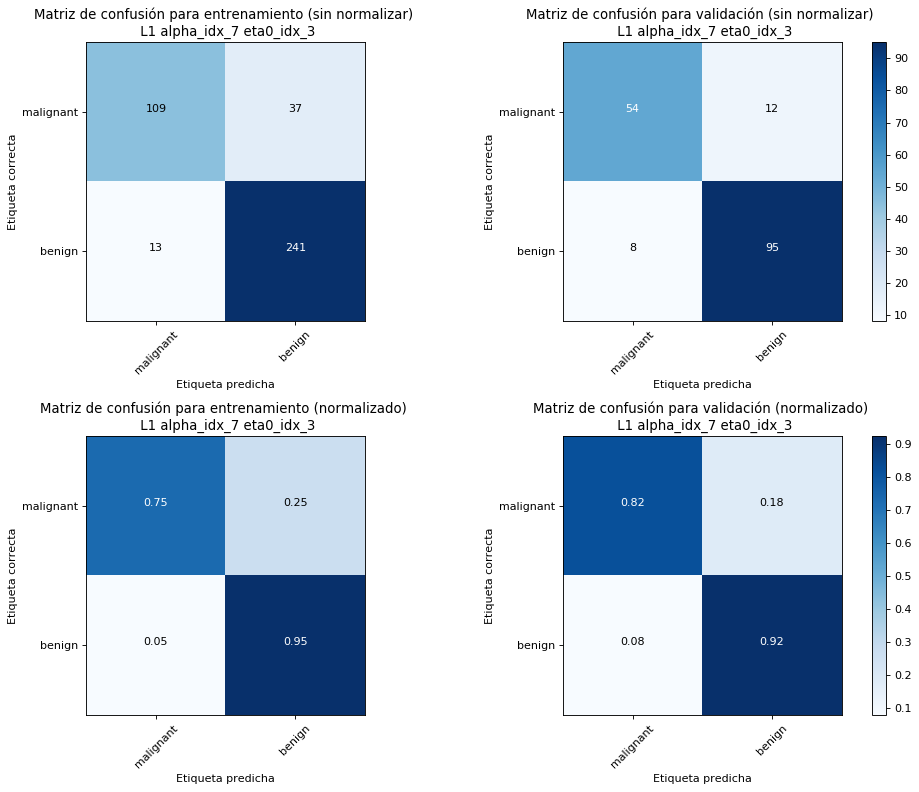

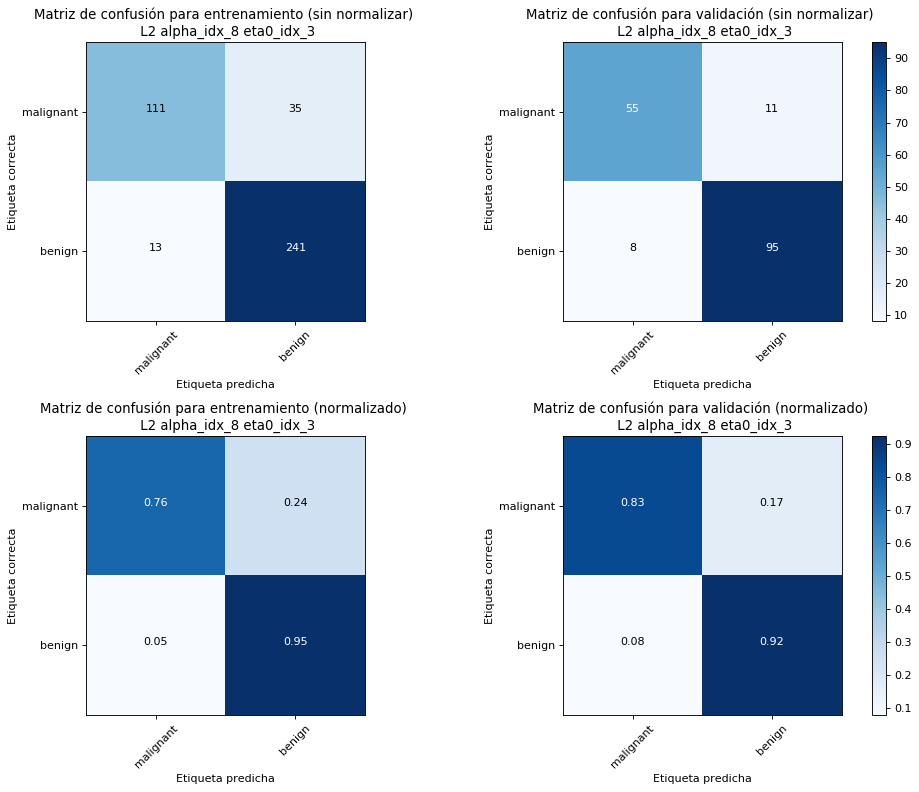

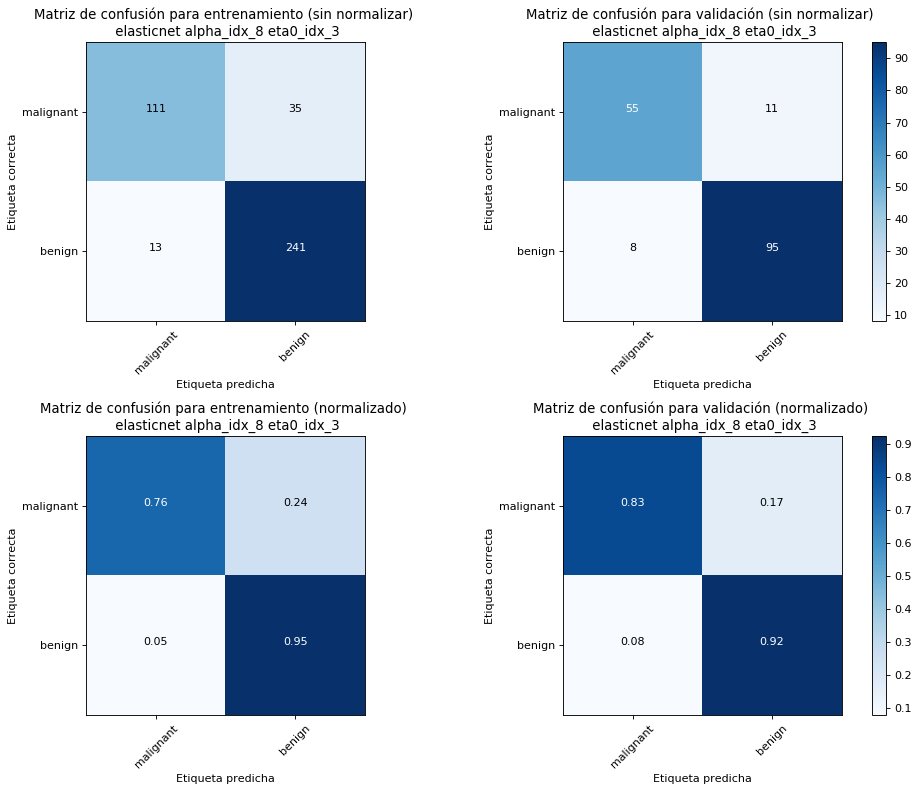

In [6]:
# Entonces veamos las matrices de confusion para las diferentes penalidades
# para l1 elegimos alpha_idx=7 /eta_idx=3
# para l2 y elasticnet elegimos alpha_idx=8 /eta_idx=3

case_var='alpha_idx_7';
case_aux='eta0_idx_3';
title_single=' \n L1 '+case_var+' '+case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l1_perceptron_dict[case_var][case_aux]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)


####### L2

case_var='alpha_idx_8';
case_aux='eta0_idx_3';
title_single=' \n L2 '+case_var+' '+case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l2_perceptron_dict[case_var][case_aux]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)


####### elasticnet

case_var='alpha_idx_8';
case_aux='eta0_idx_3';
title_single=' \n elasticnet '+case_var+' '+case_aux
title_list= [title_single,title_single,title_single,title_single]
model=elasticnet_perceptron_dict[case_var][case_aux]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)



Observamos que los resultados alcanzados son muy similares

#### Visualización de la frontera de decisión

#### L1 / L2 / (L1+L2)

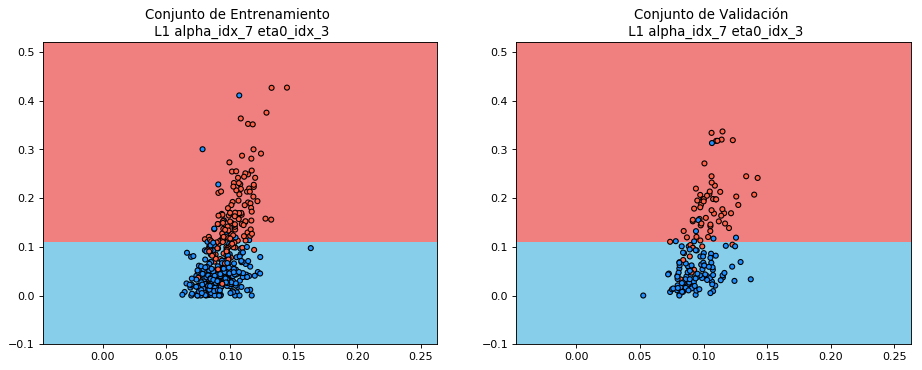

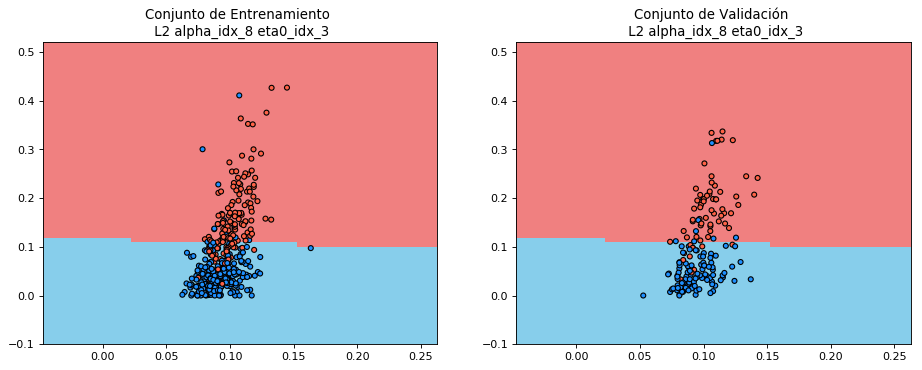

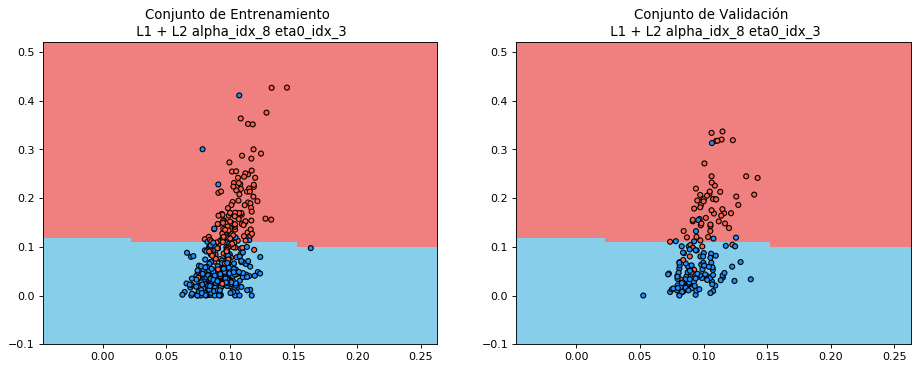

In [7]:
cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

########## L1
case_var='alpha_idx_7';
case_aux='eta0_idx_3';
title_single=' \n L1 '+case_var+' '+case_aux
title_list= [title_single,title_single]
model=l1_perceptron_dict[case_var][case_aux]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)

############ L2

case_var='alpha_idx_8';
case_aux='eta0_idx_3';
title_single=' \n L2 '+case_var+' '+case_aux
title_list= [title_single,title_single]
model=l2_perceptron_dict[case_var][case_aux]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)

########## (L1+L2)

case_var='alpha_idx_8';
case_aux='eta0_idx_3';
title_single=' \n L1 + L2 '+case_var+' '+case_aux
title_list= [title_single,title_single]
model=elasticnet_perceptron_dict[case_var][case_aux]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)


Tanto en estos graficos como en los anteriores observamos que L2 y elasticnet (L1+L2) son muy similares (alcanzando los mismos resultados en la matriz de confusion).

### Regresión logística con atributos regulares

#### L1 / L2  / (L1+L2)

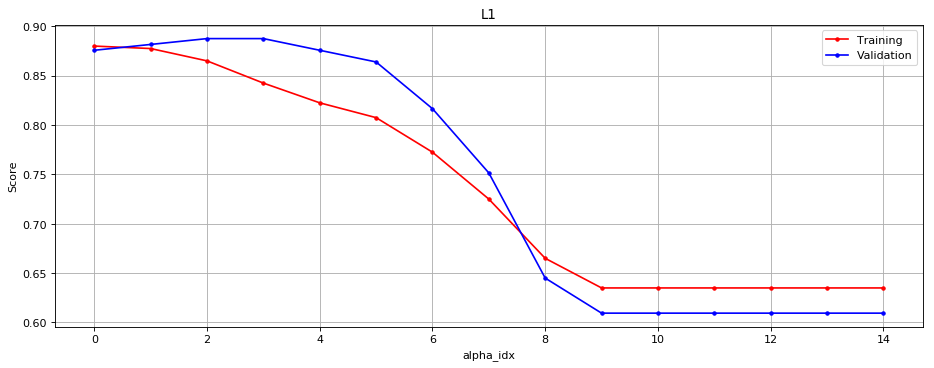

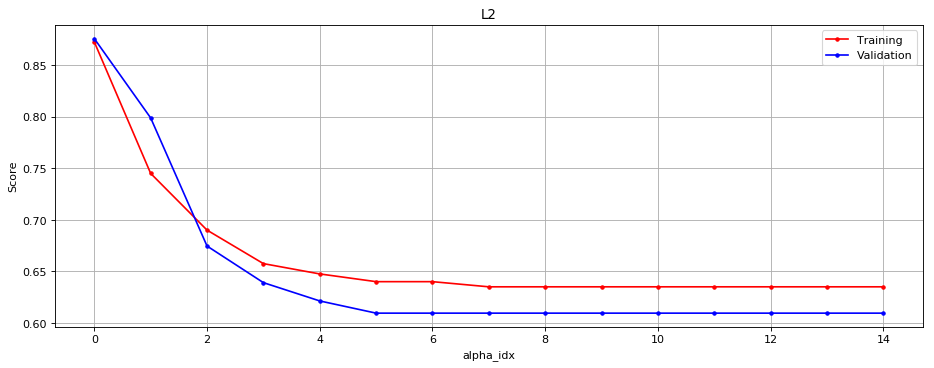

In [8]:
############### L1
# Fijamos inicialmente el tipo de regularizacion/max_iter/tol
max_iter = 200000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol = 0.0000001 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)
alpha_vec=list(np.arange(0.001,15,1)); 

var_target_name='C'; var_target_vec=list(np.true_divide(1.0,alpha_vec))
var_target_name_aux='alpha'; var_target_vec_aux=alpha_vec
penalty = 'l1' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol)

l1_breast_LR_dict,l1_list_breast=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)
# Graficamos los errores    
xo_array=np.array(l1_list_breast)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('alpha_idx')
plt.ylabel('Score')
plt.title('L1')
plt.legend(['Training','Validation'])
plt.show()

############ L2

penalty = 'l2' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol)

l2_breast_LR_dict,l2_list_breast=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)
# Graficamos los errores    
xo_array=np.array(l2_list_breast)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('alpha_idx')
plt.ylabel('Score')
plt.title('L2')
plt.legend(['Training','Validation'])
plt.show()



#### Matriz de confusión -- L1 / L2

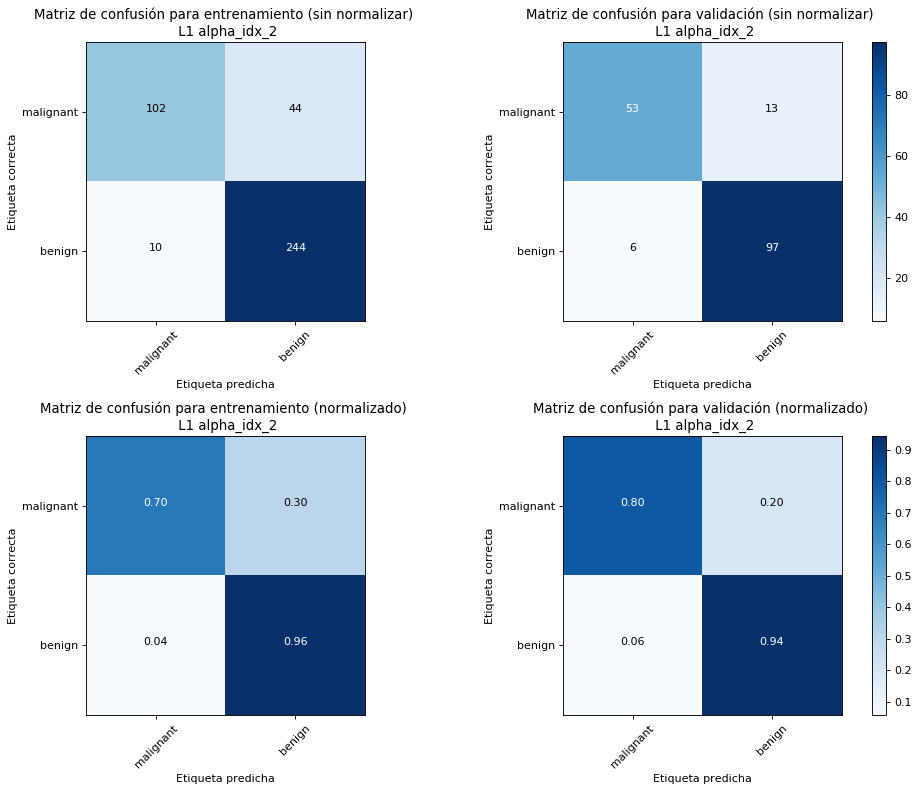

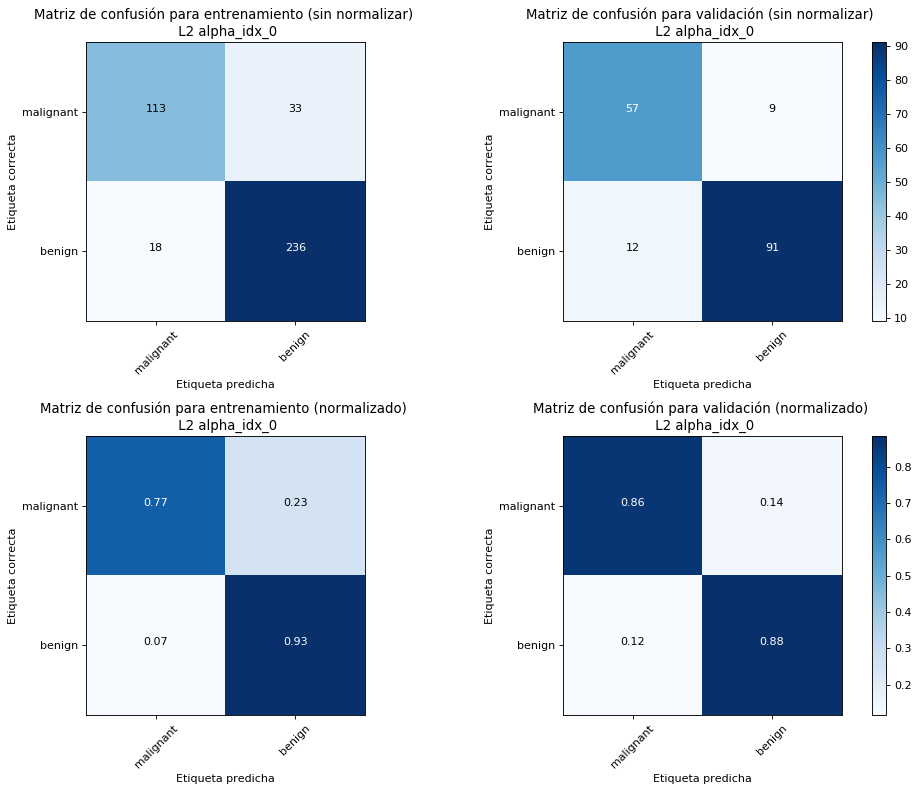

In [9]:
########## L1
case_var='alpha_idx_2';
title_single=' \n L1 '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=l1_breast_LR_dict[case_var]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)

######### L2
case_var='alpha_idx_0';
title_single=' \n L2 '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=l2_breast_LR_dict[case_var]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)



#### Visualización de la frontera de decisión -- L1 / L2

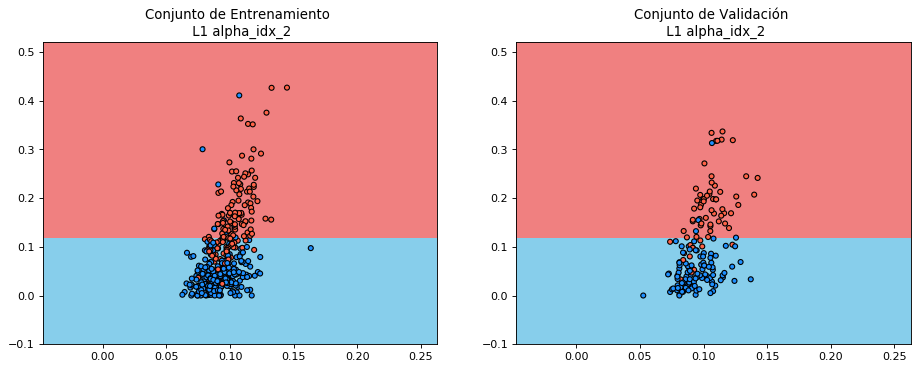

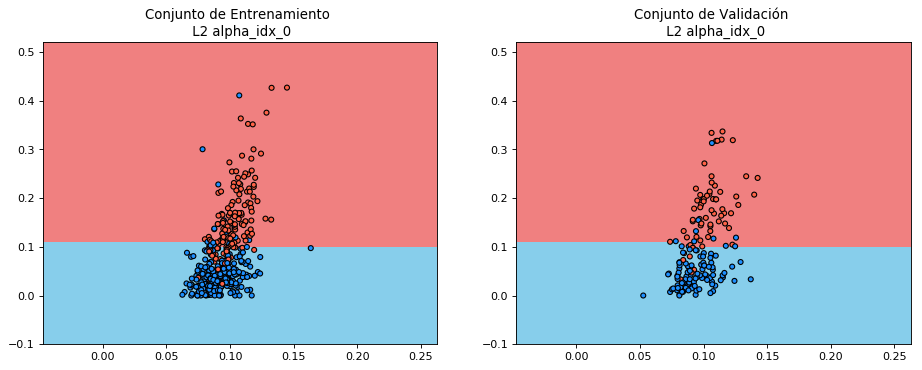

In [10]:
cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

########## L1
case_var='alpha_idx_2';
title_single=' \n L1 '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=l1_breast_LR_dict[case_var]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)

######### L2
case_var='alpha_idx_0';
title_single=' \n L2 '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=l2_breast_LR_dict[case_var]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)

### Regresión logística con atributos polinomiales

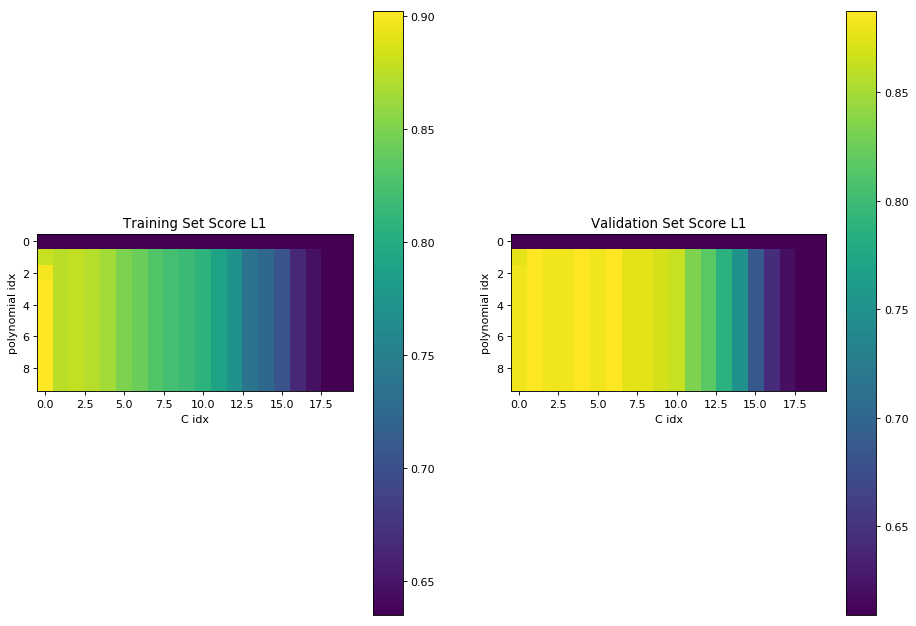

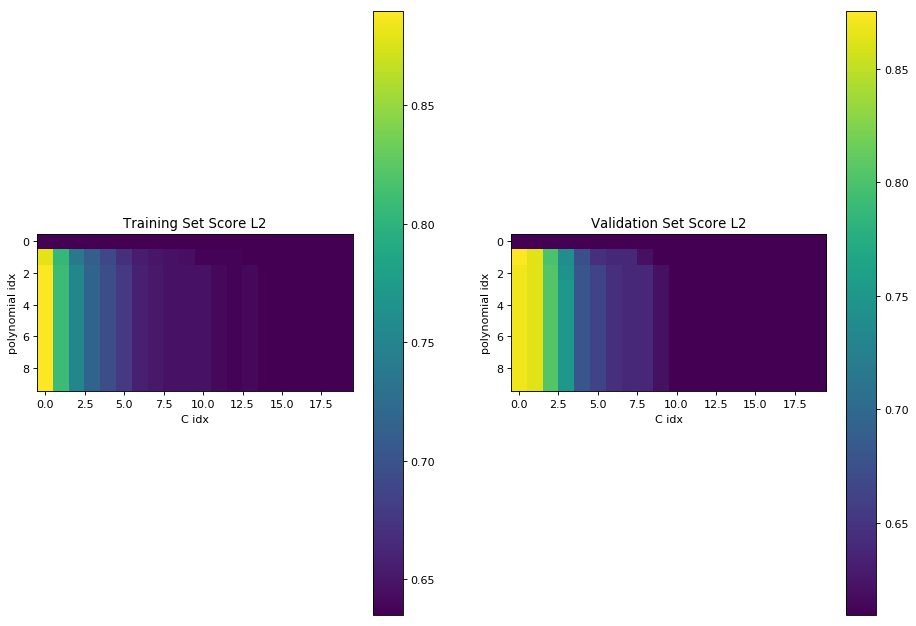

In [11]:
alpha_vec=list(np.arange(0.0001,10,0.5)); 
max_iter = 200000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol = 0.0000001 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)


##### L1
penalty = 'l1' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)

var_target_name='po'; var_target_vec=list(np.arange(0,10))
var_target_name_aux='C'; var_target_vec_aux=list(np.true_divide(1.0,alpha_vec))
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol)

l1_LR_pol,l1_list_train_val,l1_list_val_val=acc_model_pol_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

matrix_train=np.array(l1_list_train_val);matrix_val=np.array(l1_list_val_val)
two_par_heatmap(matrix_train,matrix_val,'C idx','polynomial idx',['Training Set Score L1','Validation Set Score L1'])




##### L2
penalty = 'l2' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)

var_target_name='po'; var_target_vec=list(np.arange(0,10))
var_target_name_aux='C'; var_target_vec_aux=list(np.true_divide(1.0,alpha_vec))
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol)

l2_LR_pol,l2_list_train_val,l2_list_val_val=acc_model_pol_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

matrix_train=np.array(l2_list_train_val);matrix_val=np.array(l2_list_val_val)
two_par_heatmap(matrix_train,matrix_val,'C idx','polynomial idx',['Training Set Score L2','Validation Set Score L2'])


Observamos que el score se mantiene en valores cercanos a la unidad para grados de polinomio >0 (pero sin necesidad de que sean grandes) y valores de alpha pequeños (indicado por el valor de los indices que maximizan el score).

A diferencia de la "penalidad l1" l2 es mas restricitiva en cuanto a los valores del parametro alpha pero se comporta de manera similar respecto al grado de los polinomios.

#### Matriz de confusión -- L1 / L2

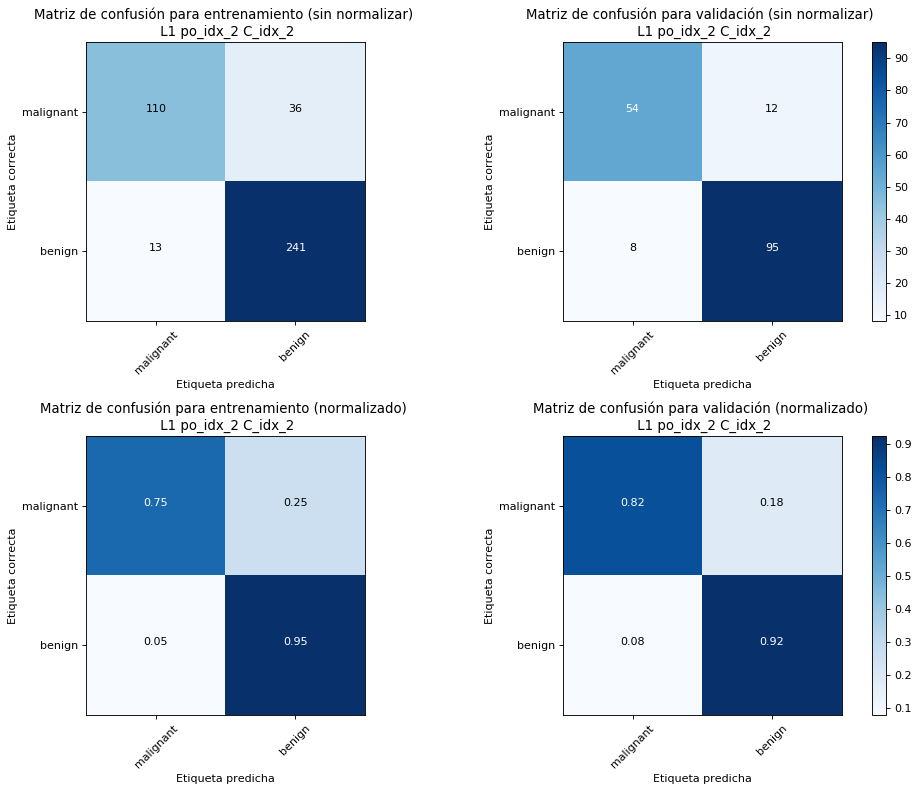

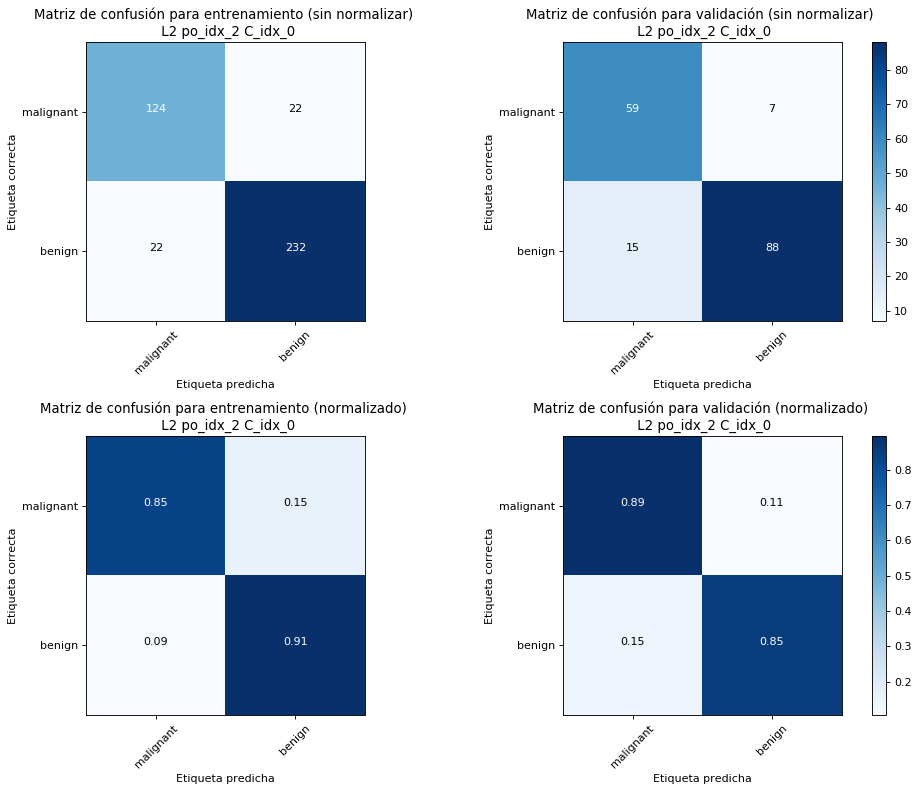

In [12]:
########## L1
case_var='po_idx_2';
case_aux='C_idx_2';
title_single=' \n L1 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l1_LR_pol[case_var][case_aux]['model']
poly_features=l1_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
mat_conf_plt(breast_cancer_data,model,X_poly_train,y_train,X_poly_val,y_val,title_list)

########## L2
case_var='po_idx_2';
case_aux='C_idx_0';
title_single=' \n L2 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l2_LR_pol[case_var][case_aux]['model']
poly_features=l2_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
mat_conf_plt(breast_cancer_data,model,X_poly_train,y_train,X_poly_val,y_val,title_list)



#### Visualización de la frontera de decisión -- L1 /L2

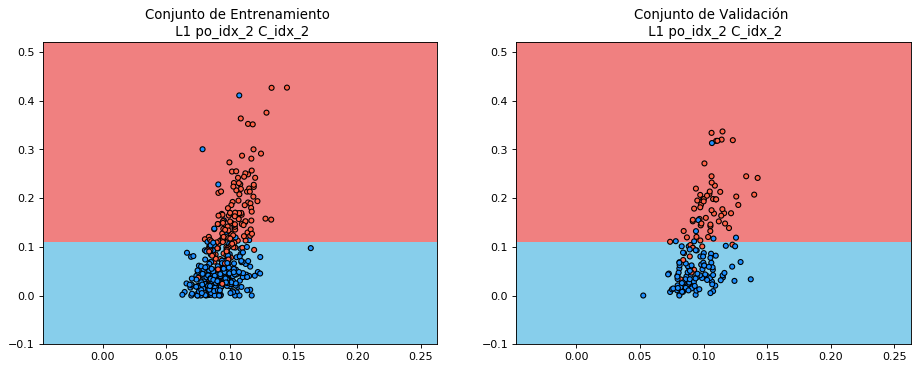

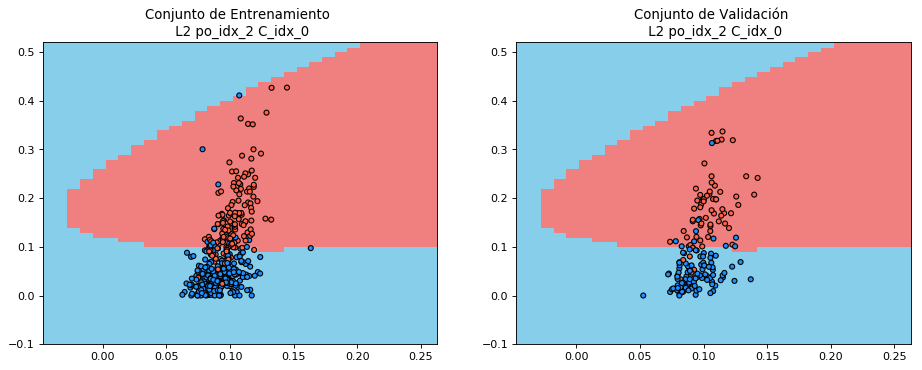

In [13]:
cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])


########## L1
case_var='po_idx_2';
case_aux='C_idx_2';
title_single=' \n L1 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l1_LR_pol[case_var][case_aux]['model']
poly_features=l1_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
boundary_pol_plt(model,X_train_feature,X_val_feature,y_train,y_val,poly_features,cmap_back,cmap_dots,title_list)

########## L2
case_var='po_idx_2';
case_aux='C_idx_0';
title_single=' \n L2 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l2_LR_pol[case_var][case_aux]['model']
poly_features=l2_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
boundary_pol_plt(model,X_train_feature,X_val_feature,y_train,y_val,poly_features,cmap_back,cmap_dots,title_list)


### Vecinos más cercanos
#### Metricas

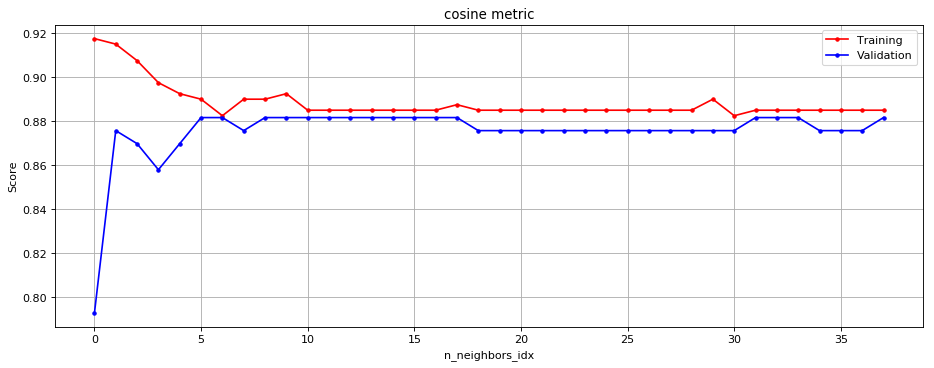

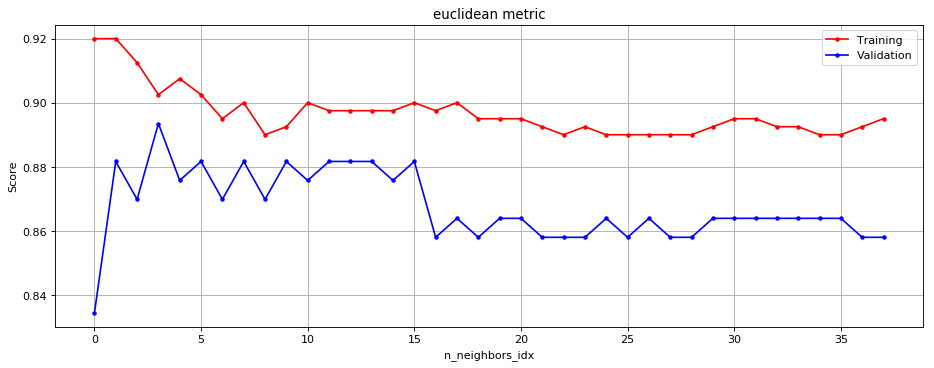

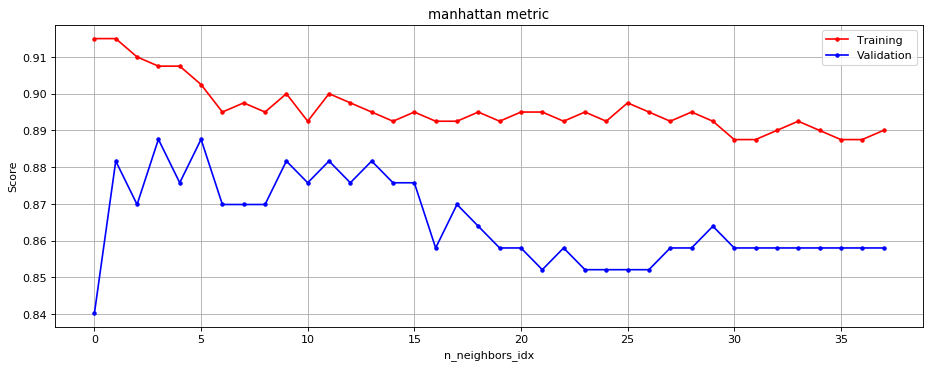

In [14]:
############
metric ='cosine' # Algunas opciones: cosine, euclidean, manhattan.
model_spec=KNeighborsClassifier(n_neighbors=1, metric=metric)
var_target_name='n_neighbors'; var_target_vec=list(np.arange(2,40,1))
var_target_name_aux=var_target_name; var_target_vec_aux=var_target_vec

kn_dict_cosine,list_n_neighbors=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

# Graficamos los errores    
xo_array=np.array(list_n_neighbors)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('n_neighbors_idx')
plt.ylabel('Score')
plt.title('cosine metric')
plt.legend(['Training','Validation'])
plt.show()

############
# metric
n_neighbors_vec=list(np.arange(2,40,1))
metric ='euclidean' # Algunas opciones: cosine, euclidean, manhattan.

model_spec=KNeighborsClassifier(n_neighbors=1, metric=metric)
var_target_name='n_neighbors'; var_target_vec=list(np.arange(2,40,1))
var_target_name_aux=var_target_name; var_target_vec_aux=var_target_vec

kn_dict_euclidean,list_n_neighbors=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

# Graficamos los errores    
xo_array=np.array(list_n_neighbors)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('n_neighbors_idx')
plt.ylabel('Score')
plt.title('euclidean metric')
plt.legend(['Training','Validation'])
plt.show()

############
# metric
metric ='manhattan' # Algunas opciones: cosine, euclidean, manhattan.
model_spec=KNeighborsClassifier(n_neighbors=1, metric=metric)
var_target_name='n_neighbors'; var_target_vec=list(np.arange(2,40,1))
var_target_name_aux=var_target_name; var_target_vec_aux=var_target_vec

kn_dict_manhattan,list_n_neighbors=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)
    
# Graficamos los errores    
xo_array=np.array(list_n_neighbors)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('n_neighbors_idx')
plt.ylabel('Score')
plt.title('manhattan metric')
plt.legend(['Training','Validation'])
plt.show()

#### Matriz de confusión

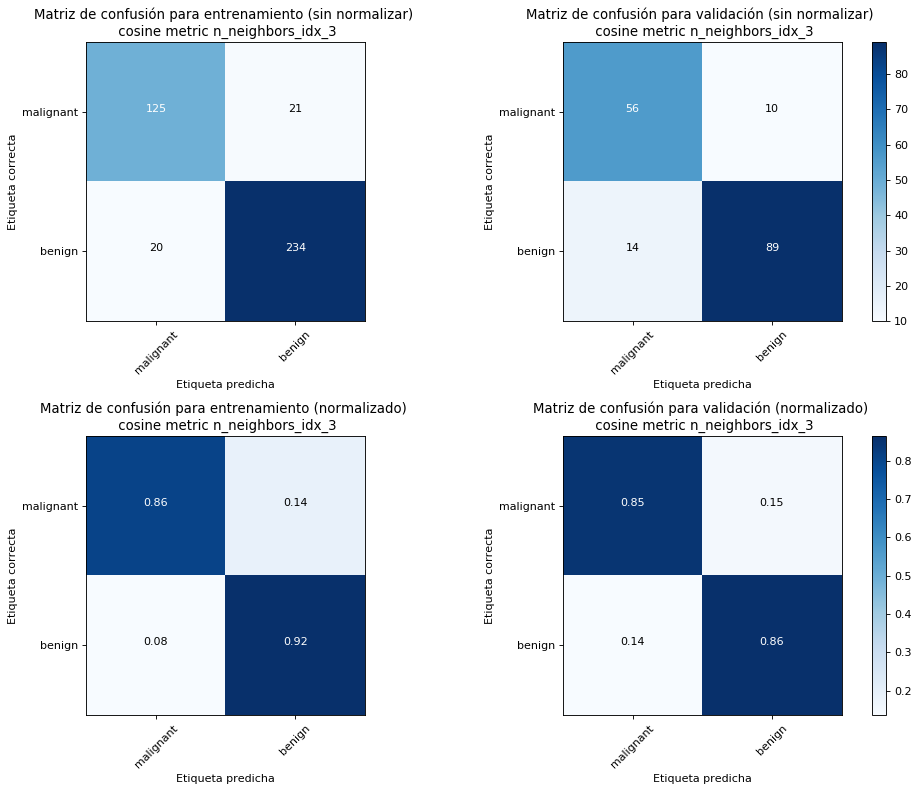

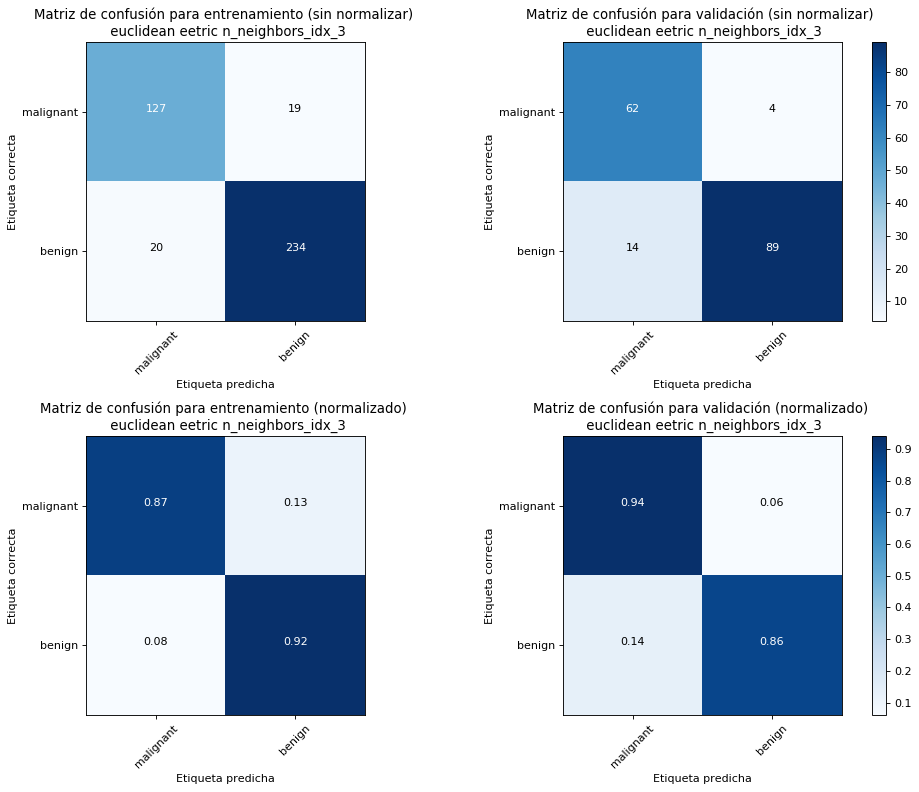

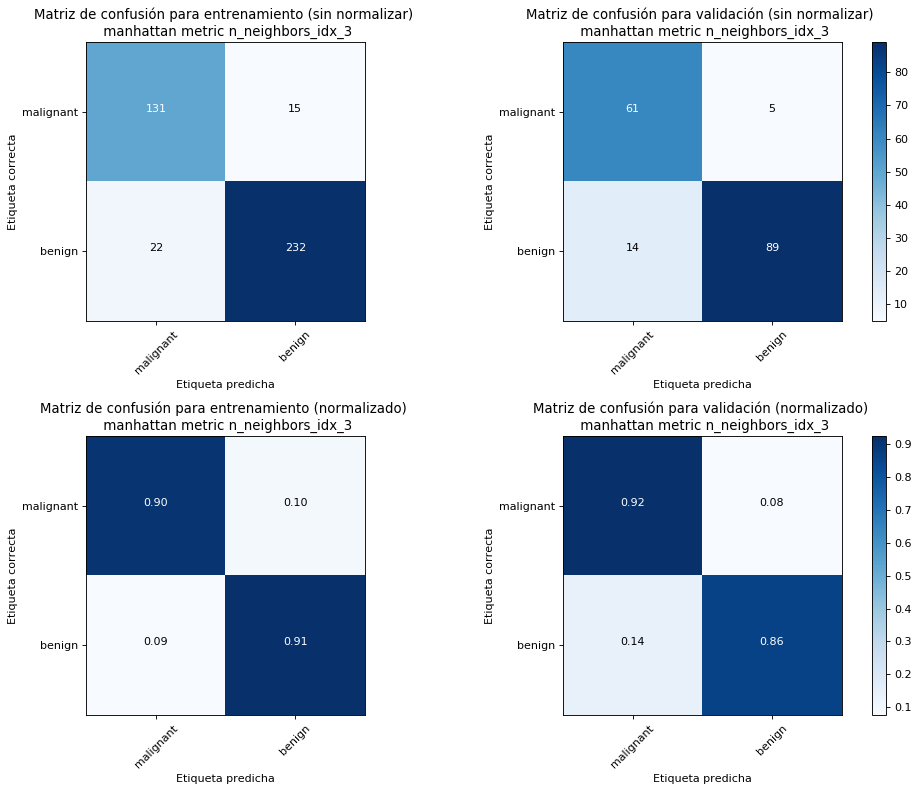

In [15]:
########## Cosine Metric
case_var='n_neighbors_idx_3';
title_single=' \n cosine metric '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=kn_dict_cosine[case_var]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)

########## Euclidean Metric
case_var='n_neighbors_idx_3';
title_single=' \n euclidean eetric '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=kn_dict_euclidean[case_var]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)

########## manhattan Metric
case_var='n_neighbors_idx_3';
title_single=' \n manhattan metric '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=kn_dict_manhattan[case_var]['model']
mat_conf_plt(breast_cancer_data,model,X_train_feature,y_train,X_val_feature,y_val,title_list)


Vemos que en la situacion presente la metrica utilizada no parece influir de manera notable (o basicamente no parece influir).

#### Visualización de la frontera de decisión

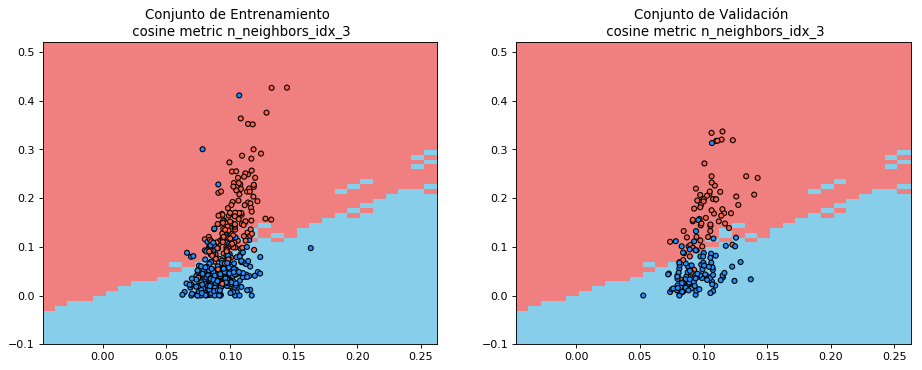

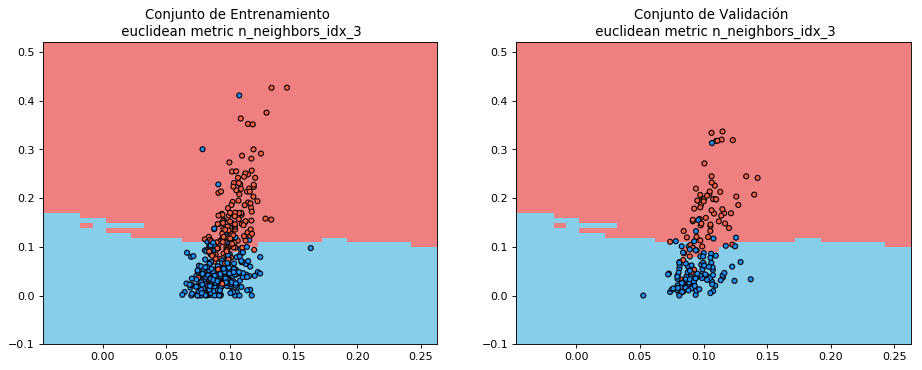

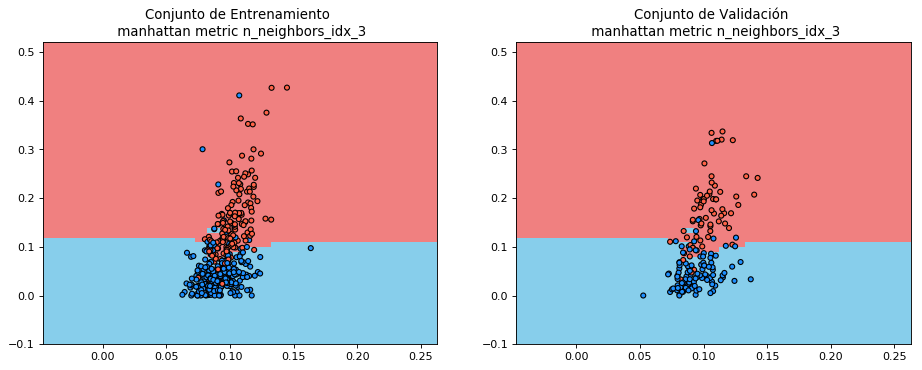

In [16]:
cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

########## Cosine metric
case_var='n_neighbors_idx_3';
title_single=' \n cosine metric '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=kn_dict_cosine[case_var]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)

########## euclidean metric
case_var='n_neighbors_idx_3';
title_single=' \n euclidean metric '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=kn_dict_euclidean[case_var]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)

########## Cosine metric
case_var='n_neighbors_idx_3';
title_single=' \n manhattan metric '+case_var
title_list= [title_single,title_single,title_single,title_single]
model=kn_dict_manhattan[case_var]['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,title_list)
